In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv("Titanic-Dataset.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [31]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [32]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
data.shape

(891, 8)

In [34]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [5]:
data=data.drop(["Name","Ticket","PassengerId","Cabin"],axis=1)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [35]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

# DATA VISUALIZATION 

Text(0, 0.5, 'No of Passengers')

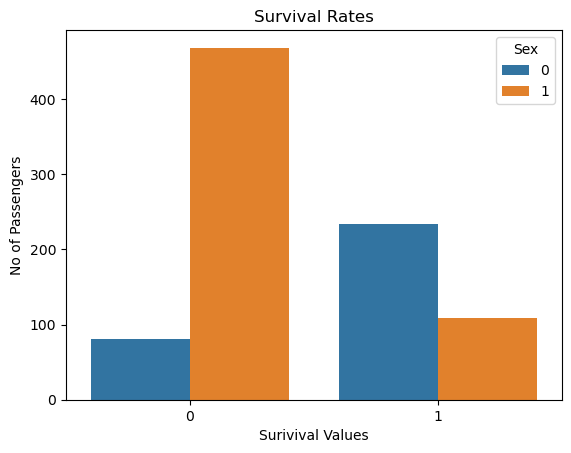

In [36]:
sns.countplot(x='Survived',hue="Sex",data=data)
plt.title("Survival Rates")
plt.xlabel('Surivival Values')
plt.ylabel("No of Passengers")

<Axes: xlabel='Pclass', ylabel='Survived'>

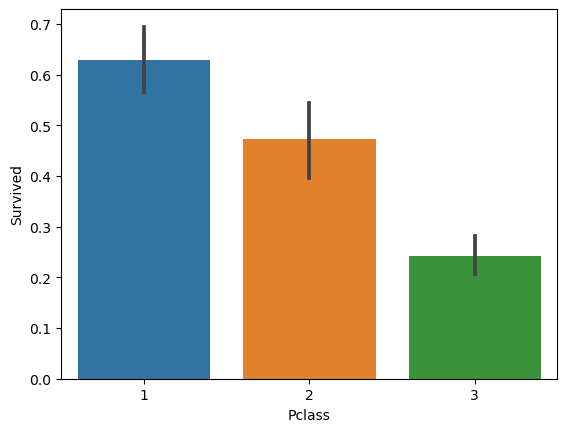

In [38]:
sns.barplot(x='Pclass',y='Survived',data=data)


<Axes: xlabel='Age', ylabel='Survived'>

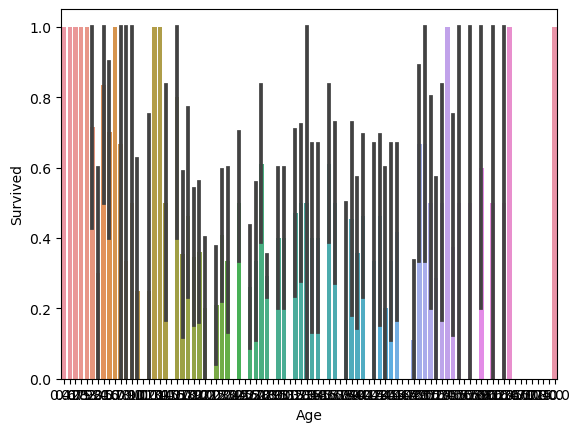

In [40]:
sns.barplot(x='Age',y='Survived',data=data)

<Axes: xlabel='Embarked', ylabel='count'>

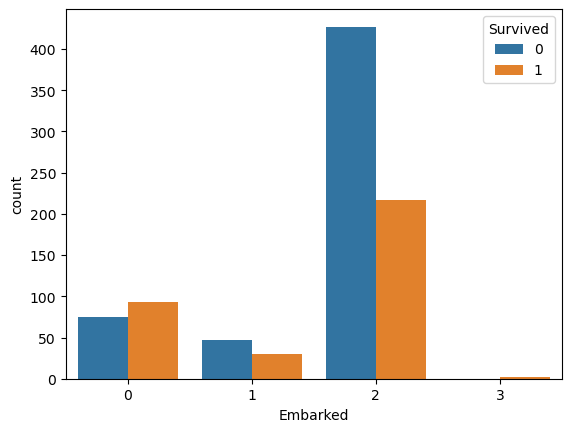

In [42]:
sns.countplot(x='Embarked',hue='Survived',data=data)

<Axes: >

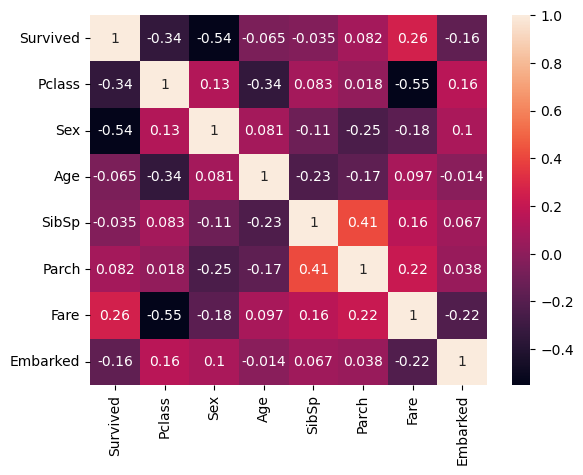

In [43]:
sns.heatmap(data.corr(),annot=True)


# LABEL ENCODING

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=["Sex","Embarked"]
for i in columns:
    data[i]=le.fit_transform(data[i])
data["Age"].fillna(data["Age"].median(),inplace=True)

In [9]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [10]:
y=data["Survived"]

In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [13]:
x= data

In [14]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Training and Test data Splitting

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
xtrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,0,3,0,28.0,0,2,15.2458,0
439,0,2,1,31.0,0,0,10.5000,2
817,0,2,1,31.0,1,1,37.0042,0
378,0,3,1,20.0,0,0,4.0125,0
491,0,3,1,21.0,0,0,7.2500,2
...,...,...,...,...,...,...,...,...
835,1,1,0,39.0,1,1,83.1583,0
192,1,3,0,19.0,1,0,7.8542,2
629,0,3,1,28.0,0,0,7.7333,1
559,1,3,0,36.0,1,0,17.4000,2


In [17]:
xtest

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,0,3,1,28.0,0,0,14.4583,0
648,0,3,1,28.0,0,0,7.5500,2
278,0,3,1,7.0,4,1,29.1250,1
31,1,1,0,28.0,1,0,146.5208,0
255,1,3,0,29.0,0,2,15.2458,0
...,...,...,...,...,...,...,...,...
780,1,3,0,13.0,0,0,7.2292,0
837,0,3,1,28.0,0,0,8.0500,2
215,1,1,0,31.0,1,0,113.2750,0
833,0,3,1,23.0,0,0,7.8542,2


In [18]:
ytrain

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [19]:
ytest

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [20]:
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [22]:
classifier =  KNeighborsClassifier(n_neighbors=18)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=18)

In [23]:
ypred=classifier.predict(xtest)

In [24]:
ypred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(ytest,ypred))

0.994413407821229


In [26]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[109   1]
 [  0  69]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      0.99        69

    accuracy                           0.99       179
   macro avg       0.99      1.00      0.99       179
weighted avg       0.99      0.99      0.99       179

